In [1]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

paragraph = """Life is beautiful, but not always. It has lots of problems you have to face everyday. 
               Don't worry though! All these problems make you strong, it gives you courage to stand alone in future.
               Life is full of moments of joy, pleasure, success and comfort punctuated by misery, defeat, failures and problems.
               There is no human being on Earth, strong, powerful, wise or rich, who has not experienced, struggle, suffering 
               or failure. You have to work hard to reach to the highest position. Life is full of paths, you just have to choose
               the right one. Life is interesting and amazing like the stars up in the skies.With no doubt, 
               Life is beautiful and full of celebrations. However you should always be ready to face adversity and challenges. 
               There are difficult situations in life as well.Be careful!! You might get hurt too hard. 
               Life is sometimes too selfish to think about yourself. Then life is too hard to handle. 
               Falling in love! People tend to fall in love nowadays but i personally think the right time has to come... 
               You might also get hurt in Love. You might be broken-hearted as the people say.
               Life is the place where people treat everyone differently, racism exists as well as bullying. 
               People tend to say bad stuff behind people's back. There are millions of people using horrible
               words to call people, People use people everyday.Life is not that easy in my view. Sometimes,
               all you want to do is sit alone and question yourself with hundred of questions.
               Am I ugly as the people say?  Why don't i have any friends?
               Why is the world so hard to live in? What do i look like in other peoples eyes?
               Why don't i have the same colour of the skin as everyone else? :'( :'(How can i make others happy?
               The questions does not stop. You ask those questions over and over again. When you don't have 
               any answers, you want to scream out loud or cry.Bullying? Racism? What are all these?, I don't understand 
               what people get from making others unhappy and upset. Every single one of you there in the world have your own beauty. 
               EVERYTHING IS BEAUTIFUL! So don't sit there saying i'm ugly say i'm PRETTY or HANDSOME, 
               Damnn care about what people say."RUMORS ARE SPREADED BY HATERS, CARRIED BY FOOLS AND ACCEPTED BY IDIOT!"
               Treat people the way they treat you! Be strong and face these saddo people around the world.
               Haters are always around you. but it doesn't matter cause they are the ones who make you famous. 
               So what? If you're not beautiful, pretty, you have life and thats the most of it. Not everyone 
               gets to live and those who do are sooo lucky! People die, life changes, people come and go but guess 
               what you have to go with it however much it hurts . You miss people who were in your life, that's the
               way they remind you that they still exist in your life. I know the feeling of that, I miss my handsome uncle
               as well but i know we can never meet again. I know he is not here anymore, So what i will still love him the
               most in my life. People say forget the past, life in present and save the future for tomorrow. I think that
               is true, but i cannot forget my past, it has all those beautiful moments which mean the world to me. It is
               the hardest thing but i just try try try and try. Don't give up or lose hope on anything.
               Live your life however you want  Have fun! Dance as much you want! Take risks.. Trust yourself. Believe in yourself....
               Damn care about haters! There is so much to do so stop faffing about.Life is too short to save it for tomorrow.
               Don't give up and Hope always! Love Forever!! Do what your heart says... DREAM AS MUCH AS YOU LIKE AND MAKE IT TRUE!
               YOU ONLY LIVE ONCE SO MAKE THE MOST OF IT ! <3 Learn lessons from the mistakes....
               From this i learned awful a lot things. I started to enjoy life instead of listening to sad songs and
               sitting alone. Happiness came into my life but there is sadness as well. Everyday i used to dress in 
               dull clothes now i love colours i used to hate going out of my house but guess what all these sound outside
               sounds attractive than sad songs. Rock music is what i listen to now, sometimes sad as well All things in 
               life depends on what your mood and the situation."""

In [2]:
# Preprocessing the data  (for more details on regular expression visit https://regexr.com/)
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [3]:
import nltk
nltk.download('punkt')
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['life is beautiful, but not always.',
 'it has lots of problems you have to face everyday.',
 "don't worry though!",
 'all these problems make you strong, it gives you courage to stand alone in future.',
 'life is full of moments of joy, pleasure, success and comfort punctuated by misery, defeat, failures and problems.',
 'there is no human being on earth, strong, powerful, wise or rich, who has not experienced, struggle, suffering or failure.',
 'you have to work hard to reach to the highest position.',
 'life is full of paths, you just have to choose the right one.',
 'life is interesting and amazing like the stars up in the skies.with no doubt, life is beautiful and full of celebrations.',
 'however you should always be ready to face adversity and challenges.',
 'there are difficult situations in life as well.be careful!!',
 'you might get hurt too hard.',
 'life is sometimes too selfish to think about yourself.',
 'then life is too hard to handle.',
 'falling in love!',
 'people t

In [4]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [5]:
sent_word

[['life', 'is', 'beautiful', ',', 'but', 'not', 'always', '.'],
 ['it',
  'has',
  'lots',
  'of',
  'problems',
  'you',
  'have',
  'to',
  'face',
  'everyday',
  '.'],
 ['do', "n't", 'worry', 'though', '!'],
 ['all',
  'these',
  'problems',
  'make',
  'you',
  'strong',
  ',',
  'it',
  'gives',
  'you',
  'courage',
  'to',
  'stand',
  'alone',
  'in',
  'future',
  '.'],
 ['life',
  'is',
  'full',
  'of',
  'moments',
  'of',
  'joy',
  ',',
  'pleasure',
  ',',
  'success',
  'and',
  'comfort',
  'punctuated',
  'by',
  'misery',
  ',',
  'defeat',
  ',',
  'failures',
  'and',
  'problems',
  '.'],
 ['there',
  'is',
  'no',
  'human',
  'being',
  'on',
  'earth',
  ',',
  'strong',
  ',',
  'powerful',
  ',',
  'wise',
  'or',
  'rich',
  ',',
  'who',
  'has',
  'not',
  'experienced',
  ',',
  'struggle',
  ',',
  'suffering',
  'or',
  'failure',
  '.'],
 ['you',
  'have',
  'to',
  'work',
  'hard',
  'to',
  'reach',
  'to',
  'the',
  'highest',
  'position',
  '.'

In [6]:
import nltk
nltk.download('stopwords')
#sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
sent_word

[['life', 'beautiful', ',', 'always', '.'],
 ['lots', 'problems', 'face', 'everyday', '.'],
 ["n't", 'worry', 'though', '!'],
 ['problems',
  'make',
  'strong',
  ',',
  'gives',
  'courage',
  'stand',
  'alone',
  'future',
  '.'],
 ['life',
  'full',
  'moments',
  'joy',
  ',',
  'pleasure',
  ',',
  'success',
  'comfort',
  'punctuated',
  'misery',
  ',',
  'defeat',
  ',',
  'failures',
  'problems',
  '.'],
 ['human',
  'earth',
  ',',
  'strong',
  ',',
  'powerful',
  ',',
  'wise',
  'rich',
  ',',
  'experienced',
  ',',
  'struggle',
  ',',
  'suffering',
  'failure',
  '.'],
 ['work', 'hard', 'reach', 'highest', 'position', '.'],
 ['life', 'full', 'paths', ',', 'choose', 'right', 'one', '.'],
 ['life',
  'interesting',
  'amazing',
  'like',
  'stars',
  'skies.with',
  'doubt',
  ',',
  'life',
  'beautiful',
  'full',
  'celebrations',
  '.'],
 ['however', 'always', 'ready', 'face', 'adversity', 'challenges', '.'],
 ['difficult', 'situations', 'life', 'well.be', 'care

In [8]:
# Training the Word2Vec model
model = Word2Vec(sent_word, min_count=1)


words = model.wv.vocab

In [9]:
# Test the word vectors
vector = model.wv['life']

print(vector)

[ 7.9939602e-04 -1.7726185e-03  1.3673755e-03 -4.7664586e-03
  4.9499176e-03  2.7316436e-03 -4.5252992e-03 -1.1586598e-03
  2.8132682e-03 -2.1571780e-03 -3.4751257e-04 -3.4319991e-03
  2.7007544e-03 -2.0935293e-03 -3.8026124e-03 -2.4461150e-03
  3.7827480e-03  4.2427126e-03  1.9337559e-03 -4.7322609e-03
  6.5889722e-04 -4.4944738e-03  1.6348395e-03 -2.8616176e-03
  2.5680794e-03 -3.3932787e-03  1.3193206e-04  2.3878999e-03
 -1.8731544e-03  1.8021419e-03 -4.9491595e-03 -4.1439324e-03
 -4.8118886e-03  4.4355616e-03 -1.3331529e-03 -2.8814441e-03
 -4.4816234e-03  2.3236652e-03 -4.1921716e-03 -3.8548284e-03
  8.9228805e-04  3.1833581e-03 -1.0542568e-04  3.1466044e-03
  2.9246791e-03 -9.5929811e-04  7.5275061e-04 -2.1365567e-03
  4.0858667e-03 -4.0847640e-03 -4.2200666e-03  4.6871197e-03
  8.6736126e-04 -1.2784047e-03  1.6906050e-04 -1.3462261e-03
  3.9386372e-03 -1.7581641e-03  2.0992665e-03  3.7022133e-03
  4.2694397e-03  1.3121758e-03  2.7811376e-03  4.5857234e-03
 -3.6955086e-04 -3.09434

In [10]:
# Most similar words
similar = model.wv.most_similar('life',topn=20)

similar

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('still', 0.25957009196281433),
 ('pleasure', 0.2516217827796936),
 ('pretty', 0.24673795700073242),
 ('(', 0.22561746835708618),
 ("'m", 0.19647887349128723),
 ('think', 0.18282487988471985),
 ('one', 0.1744590401649475),
 ('wise', 0.16931161284446716),
 ('awful', 0.16719332337379456),
 ('attractive', 0.16519418358802795),
 ('sometimes', 0.16290220618247986),
 ('back', 0.15827462077140808),
 ('dress', 0.15157659351825714),
 ('stop', 0.14916548132896423),
 ('falling', 0.1384301632642746),
 ('!', 0.13634976744651794),
 ('ones', 0.13601335883140564),
 ('peoples', 0.13003009557724),
 (',', 0.1285245567560196),
 ('view', 0.12843403220176697)]

In [11]:
# You can also check words similarity and compare above
model.wv.similarity(w1='problems',w2='hard')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


-0.04563052

In [12]:
model.wv.similarity(w1='moments',w2='situation')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


-0.023204971

In [13]:
model.wv.similarity(w1='defeat',w2='failure')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.1011059

In [14]:
#Same words similarity
model.wv.similarity(w1='future',w2='future')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


1.0

In [15]:
model.wv.similarity(w1='joy',w2='pleasure')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.097860195

In [16]:
model.wv.similarity(w1='struggle',w2='suffering')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.011055041

In [17]:
model.wv.similarity(w1='strong',w2='powerful')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.022351852

In [18]:
model.wv.similarity(w1='celebrations',w2='joy')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.13845721

In [19]:
model.wv.similarity(w1='human',w2='people')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.06389705

In [20]:
model.wv.similarity(w1='hurt',w2='broken-hearted')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.029838933

In [21]:
model.wv.similarity(w1='unhappy',w2='upset')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.1472864

In [22]:
model.wv.similarity(w1='beauty',w2='beautiful')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


-0.12218682

In [23]:
model.wv.similarity(w1='life',w2='live')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.022491034

In [24]:
model.wv.similarity(w1='future',w2='tomorrow')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.054596663

In [25]:
model.wv.similarity(w1='selfish',w2='mean')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.07512616

In [26]:
model.wv.similarity(w1='enjoy',w2='joy')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.16555059

In [27]:
model.wv.similarity(w1='sad',w2='hurt')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


-0.04610549

In [28]:
model.wv.similarity(w1='sad',w2='alone')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.19169687

In [29]:
model.wv.similarity(w1='sound',w2='songs')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.03427035

In [30]:
model.wv.similarity(w1='listening',w2='songs')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


-0.08457598

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


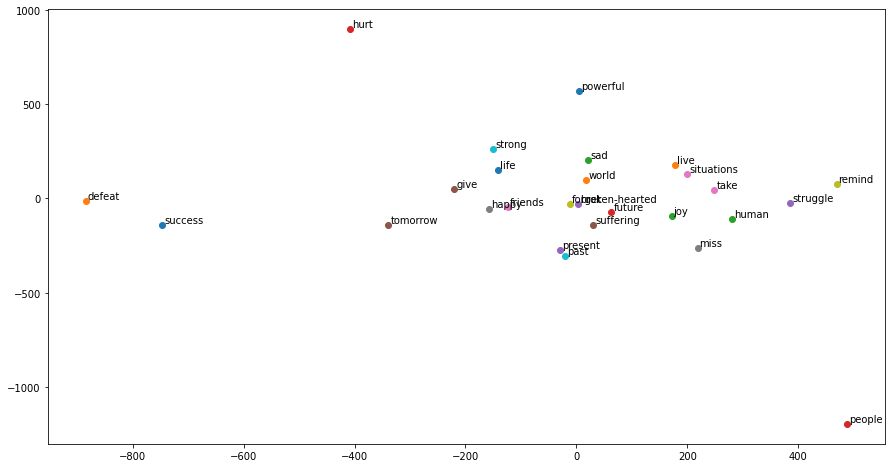

In [31]:
from sklearn.manifold import  TSNE
vocab = ['life','live','joy','future','present','tomorrow','friends','happy','forget','past','success','defeat','sad','hurt','broken-hearted','give',
         'take','miss','remind','strong','powerful','world','human','people','struggle','suffering','situations']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)